In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_45600_I')

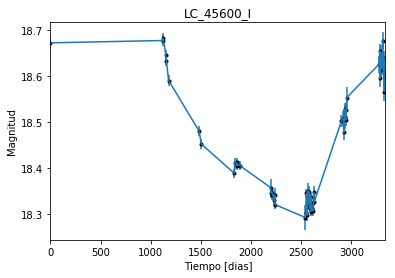

In [2]:
data = np.genfromtxt('LC_45600_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_45600_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

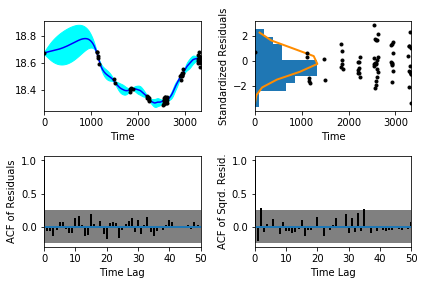

In [24]:
sample.assess_fit()

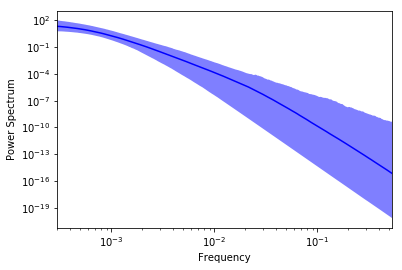

In [5]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [6]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_45600_I')

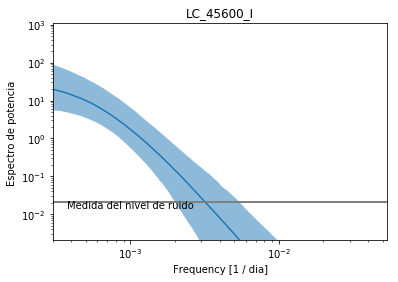

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_45600_I')

Text(0.5,1,'Prediccion , valor esperado LC_45600_I')

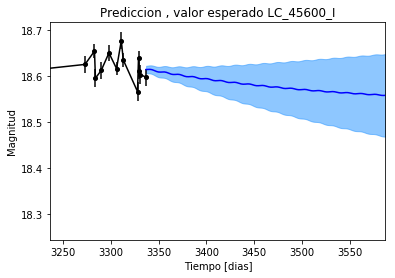

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_45600_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_45600_I')

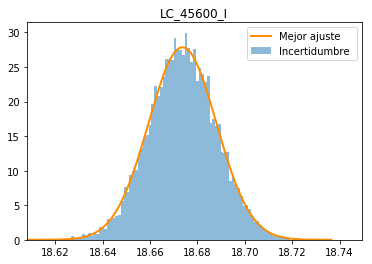

In [9]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_45600_I')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_I')

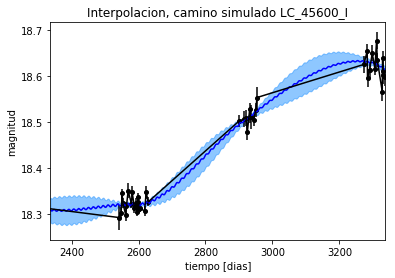

In [10]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_I')

Text(0.5,1,'Interpolacion, camino simulado LC_45600_I')

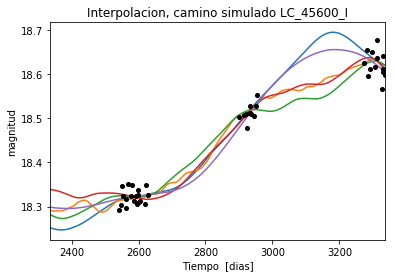

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_45600_I')

In [12]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [13]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 596.127263119
Median: 0.00830165506931
Standard deviation: 0.196485502272
68% credibility interval: [ 0.00066796  0.18698731]
95% credibility interval: [  3.29275917e-04   7.95649751e-01]
99% credibility interval: [  3.06235687e-04   9.92202505e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 668.827642469
Median: 0.000659627743725
Standard deviation: 0.0570338458426
68% credibility interval: [ 0.0003606   0.00602886]
95% credibility interval: [ 0.00030764  0.13242401]
99% credibility interval: [  3.01158609e-04   4.11521196e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 726.887711629
Median: 0.00534933744045
Standa

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1351.67417057
Median: 175.309457653
Standard deviation: 1.49728502649
68% credibility interval: [ 173.64911832  176.30910462]
95% credibility interval: [ 171.19233552  176.83975002]
99% credibility interval: [ 169.06180499  177.0573616 ]


In [15]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 823.718213201
Median: 0.371433588086
Standard deviation: 1.77457541289
68% credibility interval: [ 0.03463692  2.78692226]
95% credibility interval: [ 0.01101731  6.26043265]
99% credibility interval: [ 0.00857578  7.81019201]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1104.07337677
Median: 0.0564297553783
Standard deviation: 5.74775025237
68% credibility interval: [ 0.0020405   1.54195287]
95% credibility interval: [  2.47780120e-

In [16]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 2.1913321687e-31
Standard deviation: 1.3154512229e+58
68% credibility interval: [  8.98778925e-68   1.22206771e-08]
95% credibility interval: [  2.65507586e-105   6.17165529e+000]
99% credibility interval: [  2.27742927e-107   5.31823636e+001]


In [17]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2705.67426062
Median: 18.5491012841
Standard deviation: 0.110609491388
68% credibility interval: [ 18.45975699  18.64227153]
95% credibility interval: [ 18.33579008  18.78726621]
99% credibility interval: [ 18.21962116  18.91323806]


In [18]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 781.5714953
Median: 0.0
Standard deviation: 0.170736746849
68% credibility interval: [ 0.          0.08330098]
95% credibility interval: [ 0.          0.70144937]
99% credibility interval: [ 0.          0.94460322]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 781.5714953
Median: 0.0
Standard deviation: 0.170736746849
68% credibility interval: [ 0.          0.08330098]
95% credibility interval: [ 0.          0.70144937]
99% credibility interval: [ 0.          0.94460322]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1218.87844508
Median: 0.0
Standard deviation: 0.000164170463815
68% credibility interval: [ 0.    

In [19]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1351.67417057
Median: 175.309457653
Standard deviation: 1.49728502649
68% credibility interval: [ 173.64911832  176.30910462]
95% credibility interval: [ 171.19233552  176.83975002]
99% credibility interval: [ 169.06180499  177.0573616 ]


In [20]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2301.03454058
Median: 0.0299844040581
Standard deviation: 0.0395826715598
68% credibility interval: [ 0.01654141  0.06235684]
95% credibility interval: [ 0.00996998  0.13103537]
99% credibility interval: [ 0.00742986  0.24585864]


In [21]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2225.14561727
Median: 1.35388700404
Standard deviation: 0.192043654518
68% credibility interval: [ 1.17625538  1.56460476]
95% credibility interval: [ 1.02995246  1.77610747]
99% credibility interval: [ 0.95272577  1.90390053]


In [22]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1542.25722055
Median: 3.54511508359e-06
Standard deviation: 0.000459863129035
68% credibility interval: [  1.05532592e-07   1.12134776e-04]
95% credibility interval: [  1.01876728e-08   1.33034446e-03]
99% credibility interval: [  2.60771165e-09   3.23134529e-03]


In [23]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 596.127263119
Median: (-0.0521608371567+0j)
Standard deviation: 1.63553123093
68% credibility interval: [-1.17487595-2.42620027j -0.00419693-0.209054j  ]
95% credibility interval: [ -4.99921483e+00+0.j          -2.06890160e-03-0.38428483j]
99% credibility interval: [ -6.23419220e+00+0.j          -1.92413557e-03-0.00159389j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 668.827642469
Median: (-0.00414456334758+0j)
Standard deviation: 1.13104135644
68% credibility interval: [-0.03788044+0.27877875j -0.00226570+0.j        ]
95% credibility interval: [-0.83204457 +2.59002200e+00j -0.00193293 +4.97104374e-05j]
99% credibility interval: [ -2.58566393e+00+1.72797946j  -1.89223535e-03+0.j        ]
Posterior summary for param